In [32]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [34]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning

In [35]:
print(raw_data['calories'])
print(raw_data['calories'].isnull())

0         426.0
1         403.0
2         165.0
3           NaN
4         547.0
5         948.0
6           NaN
7           NaN
8         170.0
9         602.0
10        256.0
11          NaN
12        766.0
13        174.0
14        134.0
15        382.0
16        146.0
17        890.0
18        107.0
19        421.0
20        345.0
21          NaN
22          NaN
23          NaN
24        279.0
25         95.0
26        215.0
27         14.0
28        351.0
29        311.0
          ...  
20022     600.0
20023     293.0
20024     303.0
20025     447.0
20026       NaN
20027     738.0
20028     216.0
20029     239.0
20030    1168.0
20031     234.0
20032      16.0
20033     201.0
20034     418.0
20035       NaN
20036     161.0
20037     227.0
20038     235.0
20039     364.0
20040     899.0
20041     843.0
20042       NaN
20043    1086.0
20044      84.0
20045     182.0
20046     998.0
20047      28.0
20048     671.0
20049     563.0
20050     631.0
20051     560.0
Name: calories, Length: 

In [36]:
print(raw_data['calories'].isnull().sum())

4117


In [37]:
print(raw_data['calories'].isnull().values.any())

True


In [38]:
print(raw_data['calories'].isnull().sum().sum())

4117


In [39]:
print(raw_data.fillna(0, inplace=True))

None


In [40]:
print(raw_data.sum())

title                    Lentil, Apple, and Turkey Wrap Boudin Blanc Te...
rating                                                             74482.5
calories                                                       1.00756e+08
protein                                                        1.59156e+06
fat                                                             5.5046e+06
sodium                                                         9.91985e+07
#cakeweek                                                                6
#wasteless                                                               1
22-minute meals                                                         17
3-ingredient recipes                                                    27
30 days of groceries                                                     7
advance prep required                                                  109
alabama                                                                  3
alaska                   

# 30 Most Valuable Features

In [41]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = raw_data.iloc[:,1:]
y = np.array(raw_data.rating).astype(int)
ch2 = SelectKBest(chi2, k=30) 
X = ch2.fit_transform(X, y)
print(X)

[[  2.5   426.     30.    ...   0.      0.      1.   ]
 [  4.375 403.     18.    ...   0.      0.      0.   ]
 [  3.75  165.      6.    ...   0.      0.      1.   ]
 ...
 [  4.375 563.     31.    ...   0.      0.      1.   ]
 [  4.375 631.     45.    ...   1.      0.      0.   ]
 [  4.375 560.     73.    ...   0.      0.      0.   ]]


In [42]:
from sklearn.feature_selection import SelectKBest, f_classif
select_k_best_classifier = SelectKBest(chi2, k=30).fit_transform(X, y) #Check

df = pd.DataFrame(select_k_best_classifier)

print(df)

#feature_names = list(df.columns.values)
#print(feature_names)
#mask = select_k_best_classifier.get_support() #list of booleans
#new_features = [] # The list of your K best features

#for bool, feature in zip(mask, feature_names):
    #if bool:
        #new_features.append(feature)

          0       1     2     3       4    5    6    7    8    9   ...   20  \
0      2.500   426.0  30.0   7.0   559.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
1      4.375   403.0  18.0  23.0  1439.0  0.0  1.0  0.0  1.0  0.0  ...  0.0   
2      3.750   165.0   6.0   7.0   165.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
3      5.000     0.0   0.0   0.0     0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0   
4      3.125   547.0  20.0  32.0   452.0  0.0  1.0  0.0  1.0  0.0  ...  0.0   
5      4.375   948.0  19.0  79.0  1042.0  0.0  0.0  0.0  1.0  0.0  ...  0.0   
6      4.375     0.0   0.0   0.0     0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0   
7      3.750     0.0   0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
8      4.375   170.0   7.0  10.0  1272.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
9      3.750   602.0  23.0  41.0  1696.0  0.0  0.0  0.0  0.0  0.0  ...  0.0   
10     3.750   256.0   4.0   5.0    30.0  0.0  0.0  0.0  1.0  0.0  ...  0.0   
11     4.375     0.0   0.0   0.0     0.0  0.0  0.0  

In [43]:
new_data = df.rename(columns={ 0 : "rating", 1 : "calories", 2 : "protein", 3 : "fat", 4 : "sodium"})
print(new_data)

       rating  calories  protein   fat  sodium    5    6    7    8    9  ...  \
0       2.500     426.0     30.0   7.0   559.0  0.0  0.0  0.0  0.0  0.0  ...   
1       4.375     403.0     18.0  23.0  1439.0  0.0  1.0  0.0  1.0  0.0  ...   
2       3.750     165.0      6.0   7.0   165.0  0.0  0.0  0.0  0.0  0.0  ...   
3       5.000       0.0      0.0   0.0     0.0  0.0  0.0  0.0  1.0  0.0  ...   
4       3.125     547.0     20.0  32.0   452.0  0.0  1.0  0.0  1.0  0.0  ...   
5       4.375     948.0     19.0  79.0  1042.0  0.0  0.0  0.0  1.0  0.0  ...   
6       4.375       0.0      0.0   0.0     0.0  0.0  0.0  0.0  1.0  0.0  ...   
7       3.750       0.0      0.0   0.0     0.0  0.0  0.0  0.0  0.0  0.0  ...   
8       4.375     170.0      7.0  10.0  1272.0  0.0  0.0  0.0  0.0  0.0  ...   
9       3.750     602.0     23.0  41.0  1696.0  0.0  0.0  0.0  0.0  0.0  ...   
10      3.750     256.0      4.0   5.0    30.0  0.0  0.0  0.0  1.0  0.0  ...   
11      4.375       0.0      0.0   0.0  

In [44]:
#data = X.tolist()
#print(data)
#X = ch2.fit_transform(X, y)
#print(X)
#print(X.shape)
#print(y.shape)
#print(X.describe())

# Binary Classifier

In [45]:
new_data.rating.describe()
#raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

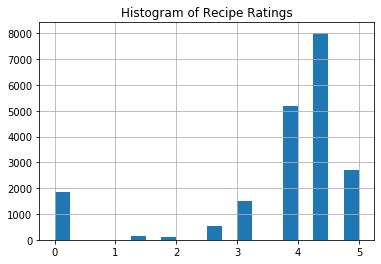

In [46]:
new_data.rating.hist(bins=20)
#raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

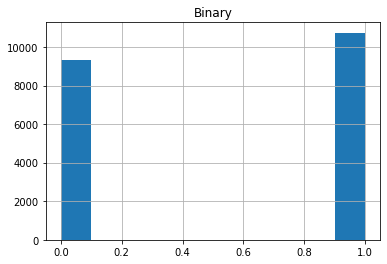

In [47]:
new_data.rating = [1 if i > 4 else 0 for i in raw_data.rating]
new_data.rating.hist()
#raw_data.rating = [1 if i > 4 else 0 for i in raw_data.rating]
#raw_data.rating.hist()
plt.title('Binary')
plt.show()

In [48]:
from sklearn.svm import SVR
svm = SVR(kernel = 'linear')
X = new_data.drop(['rating', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = new_data.rating.sample(frac=0.3, replace=True, random_state=1)
svm.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

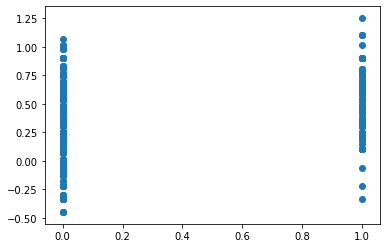

In [49]:
plt.scatter(Y, svm.predict(X))

In [50]:
svm.score(X, Y)

-0.4102674176487431

In [51]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X, Y, cv=5)

array([-0.46316311, -0.43086355, -0.32527941, -0.47978322, -0.47607355])

In [52]:
from sklearn import datasets, linear_model
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#new_data = pd.DataFrame(StandardScaler().fit_transform(new_data), columns=new_data.columns, index=new_data.index)
#new_data = new_data.rename(columns={ 0 : "rating", 1 : "calories", 2 : "protein", 3 : "fat", 4 : "sodium"})
#X = new_data.drop(['rating', 'calories', 'protein', 'fat', 'sodium'],1).sample(frac=0.3, replace=True, random_state=1)
#Y = new_data.rating.sample(frac=0.3, replace=True, random_state=1)
svc = SVC(kernel = 'linear')
print(cross_val_score(svc, X, Y, cv=5))

[0.55315615 0.56229236 0.57190357 0.56857855 0.5515807 ]


In [53]:
#You should use PCA for this exercise.

In [54]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [55]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')
raw_data['calories']
raw_data['calories'].isnull()
raw_data.fillna(0, inplace=True)

In [56]:
X = raw_data.iloc[:,1:]
y = np.array(raw_data.rating).astype(int)
ch2 = SelectKBest(chi2, k=30) 
X = ch2.fit_transform(X, y)
from sklearn.feature_selection import SelectKBest, f_classif
select_k_best_classifier = SelectKBest(chi2, k=30).fit_transform(X, y)
df = pd.DataFrame(select_k_best_classifier)
new_data = df.rename(columns={ 0 : "rating", 1 : "calories", 2 : "protein", 3 : "fat", 4 : "sodium"})

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(new_data)
new_data = scaler.transform(new_data)

In [57]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [58]:
#Must get SVM model

In [59]:
#cross_val_score(svm, X_pca, Y, cv=5)

In [60]:
#Leave everything the way it is and make sure there's no errors.

In [61]:
#print(new_data)

In [62]:
#new_data1 = pd.DataFrame(StandardScaler().fit_transform(new_data))
#print(new_data1)

In [63]:
#from sklearn import datasets, linear_model
#from sklearn.svm import SVC
#from sklearn.model_selection import cross_val_score
#new_data = pd.DataFrame(StandardScaler().fit_transform(new_data), columns=new_data.columns, index=new_data.index)
#new_data = new_data.rename(columns={ 0 : "rating", 1 : "calories", 2 : "protein", 3 : "fat", 4 : "sodium"})
#X = new_data.drop(['rating', 'calories', 'protein', 'fat', 'sodium'],1).sample(frac=0.3, replace=True, random_state=1)
#Y = new_data.rating.sample(frac=0.3, replace=True, random_state=1)
#svc = SVC(kernel = 'linear')
#print(cross_val_score(svc, X, Y, cv=5))